<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [70]:
# type your code here
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

#### Read the data

Load the csv file and print the first five observations.

In [71]:
# type your code here
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,V_length,D_length,C_length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Our objective is to predict the weight of a fish.

**The data definition is as follows:** <br>

**Species:** Species of a fish

**Weight:** Weight of a fish (target/dependent variable)

**V_length:** Vertical length of a fish

**D_length:** Diagonal length of a fish

**C_length:** Cross length of a fish

**Height:** Height of a fish

**Width:** Diagonal width of a fish

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   V_length  159 non-null    float64
 3   D_length  159 non-null    float64
 4   C_length  159 non-null    float64
 5   Height    159 non-null    float64
 6   Width     159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [73]:
num_data = df.select_dtypes(include = np.number)
cat_data = df.select_dtypes(exclude = np.number)

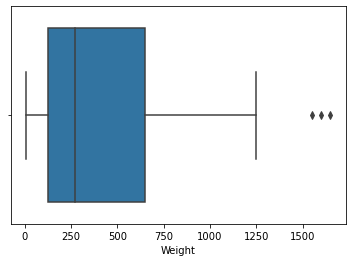

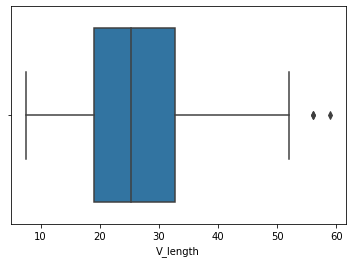

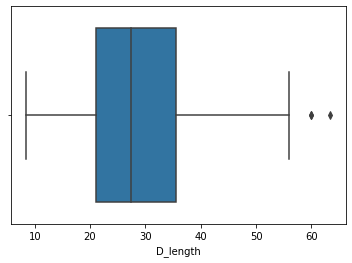

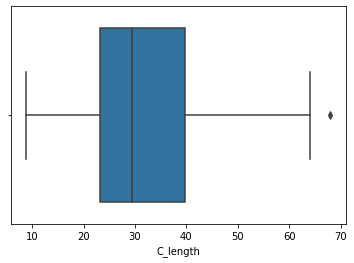

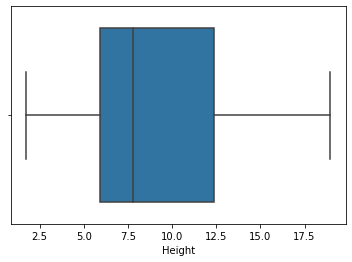

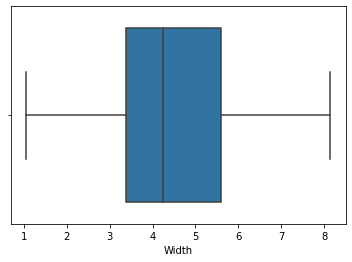

In [74]:
for i in num_data.columns:
    sns.boxplot(num_data[i])
    plt.show()

In [75]:
for i in num_data.columns:
    q1 = num_data[i].quantile(0.25)
    q3 = num_data[i].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.99))
    num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))

<ipython-input-75-055431d9fa36>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.99))
<ipython-input-75-055431d9fa36>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))


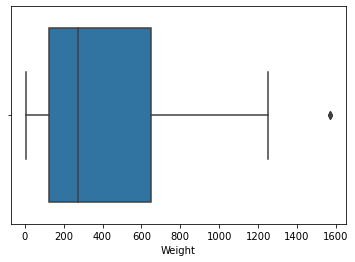

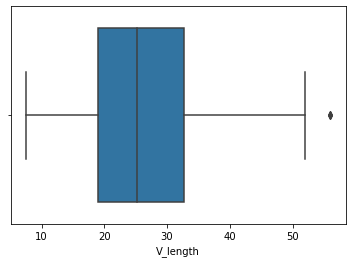

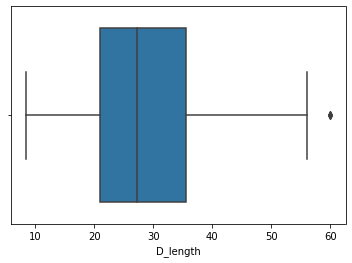

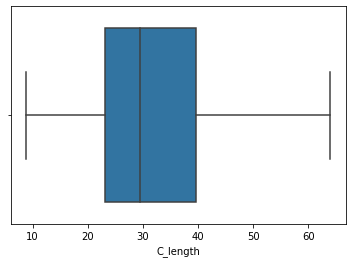

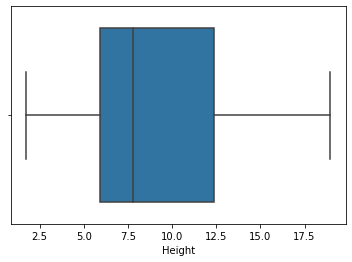

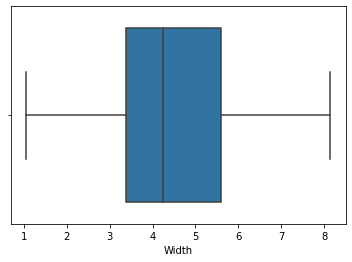

In [76]:
for i in num_data.columns:
    sns.boxplot(num_data[i])
    plt.show()

In [77]:
new = pd.get_dummies(cat_data,drop_first=True)
new

,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
154,0,0,0,0,1,0
155,0,0,0,0,1,0
156,0,0,0,0,1,0
157,0,0,0,0,1,0


In [78]:
data = pd.concat((num_data,new),axis=1)
data.head()

,Weight,V_length,D_length,C_length,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [79]:
inp = data.drop('Weight',axis=1)
out = data['Weight']

In [80]:
sc = StandardScaler()
inp_sc = sc.fit_transform(inp)
inp_sc = pd.DataFrame(inp_sc,columns=inp.columns)
inp_sc.head()

,V_length,D_length,C_length,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,-0.305717,-0.282067,-0.104532,0.596579,-0.236529,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803
1,-0.224954,-0.197287,-0.000164,0.821261,-0.066579,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803
2,-0.235049,-0.178447,-0.008861,0.797341,0.165793,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803
3,0.007238,0.057053,0.199874,0.879771,0.022621,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803
4,0.027429,0.057053,0.243360,0.812835,0.426371,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803


In [81]:
box_out,lam = stats.boxcox(out)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model on the scaled data and check whether the model is overfitting or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [82]:
# type your code here
inpc = sm.add_constant(inp_sc)
ols = sm.OLS(box_out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1906.
Date:                Fri, 09 Oct 2020   Prob (F-statistic):          1.52e-152
Time:                        02:41:46   Log-Likelihood:                -140.51
No. Observations:                 159   AIC:                             305.0
Df Residuals:                     147   BIC:                             341.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                16.4620      0.048    340.879      0.000      16.367      16.557
V_length              4.1238      2.360      1.748      0.083      -0.539       8.787
D_length             -3.6938      3.145     -1.174      0.242      -9.909       2.522
C_length              4.0196      2.222      1.809      0.073      -0.372       8.411
Height                1.7059      0.368      4.633      0.000       0.978       2.434
Width                 1.5250      0.260      5.864      0.000       1.011       2.039
Species_Parkki        0.2583      0.126      2.056      0.042       0.010       0.506
Species_Perch         0.6263      0.372      1.684      0.094      -0.109       1.361
Species_Pike         -0.1919      0.272     -0.706      0.481      -0.729       0.345
Species_Roach         0.2701      0.196      1.379      0.170      -0.117       0.657
Species_Smelt         0.0372      0.220      0.169      0.866      -0.397       0.471
Species_Whitefish     0.3445      0.119      2.894      0.004       0.109       0.580
==============================================================================
Omnibus:                       29.407   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.982
Skew:                          -0.570   Prob(JB):                     1.08e-25
Kurtosis:                       7.007   Cond. No.                         179.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
lr = LinearRegression()
mse = abs(cross_val_score(lr,inp_sc,box_out,cv=3,scoring= 'neg_mean_squared_error'))
be = np.mean(mse)
ve = np.std(mse)
cva = ve/be
res = [be,ve,cva]
res

[1.1860261781605963, 0.7843637920229192, 0.6613376723601381]

As the Coefficient of Variance is too high, The model is overfitting model

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present in the scaled data?
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [84]:
# type your code here
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp_sc.values,i) for i in range(inp_sc.shape[1])]
vif['Features'] = inp_sc.columns
vif = vif.sort_values('VIF',ascending=False)
vif

,VIF,Features
1,4241.408465,D_length
0,2387.385815,V_length
2,2117.483920,C_length
6,59.297057,Species_Perch
3,58.138540,Height
7,31.687382,Species_Pike
4,29.004775,Width
9,20.676150,Species_Smelt
8,16.461125,Species_Roach
5,6.762748,Species_Parkki


In [85]:
inpv1 = inp_sc.drop('D_length',axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv1.values,i) for i in range(inpv1.shape[1])]
vif['Features'] = inpv1.columns
vif = vif.sort_values('VIF',ascending=False)
vif

,VIF,Features
1,1249.910576,C_length
0,1071.366803,V_length
2,57.975093,Height
5,45.686508,Species_Perch
6,28.886930,Species_Pike
3,28.743315,Width
8,18.958907,Species_Smelt
7,15.137406,Species_Roach
4,5.788297,Species_Parkki
9,5.032330,Species_Whitefish


In [86]:
inpv2 = inpv1.drop('C_length',axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv2.values,i) for i in range(inpv2.shape[1])]
vif['Features'] = inpv2.columns
vif = vif.sort_values('VIF',ascending=False)
vif

,VIF,Features
1,55.197689,Height
2,28.490107,Width
0,28.005120,V_length
4,27.025485,Species_Perch
5,26.543254,Species_Pike
7,11.786573,Species_Smelt
6,11.423825,Species_Roach
8,3.930857,Species_Whitefish
3,2.622297,Species_Parkki


In [87]:
inpv3 = inpv2.drop('Height',axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv3.values,i) for i in range(inpv3.shape[1])]
vif['Features'] = inpv3.columns
vif = vif.sort_values('VIF',ascending=False)
vif

,VIF,Features
0,23.941119,V_length
1,18.311239,Width
4,5.680722,Species_Pike
6,2.207111,Species_Smelt
3,1.842907,Species_Perch
5,1.637191,Species_Roach
2,1.447770,Species_Parkki
7,1.153708,Species_Whitefish


In [88]:
inpv4 = inpv3.drop('V_length',axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv4.values,i) for i in range(inpv4.shape[1])]
vif['Features'] = inpv4.columns
vif = vif.sort_values('VIF',ascending=False)
vif

,VIF,Features
5,2.191815,Species_Smelt
0,1.926255,Width
2,1.756637,Species_Perch
4,1.608685,Species_Roach
1,1.437283,Species_Parkki
3,1.334448,Species_Pike
6,1.127275,Species_Whitefish


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Apply the ridge regression with 'alpha = 1.5' and compare the RMSE on the test dataset with the RMSE obtained from linear regression using OLS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [89]:
xtrain,xtest,ytrain,ytest = train_test_split(inpv4,box_out,test_size=0.3,random_state= 48)

In [90]:
inpc = sm.add_constant(inpv4)
ols = sm.OLS(box_out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     776.4
Date:                Fri, 09 Oct 2020   Prob (F-statistic):          6.00e-115
Time:                        02:41:48   Log-Likelihood:                -248.35
No. Observations:                 159   AIC:                             512.7
Df Residuals:                     151   BIC:                             537.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                16.4620      0.094    175.336      0.000      16.277      16.648
Width                 6.2452      0.130     47.926      0.000       5.988       6.503
Species_Parkki       -0.2759      0.113     -2.451      0.015      -0.498      -0.054
Species_Perch        -1.3636      0.124    -10.958      0.000      -1.609      -1.118
Species_Pike          0.5109      0.108      4.711      0.000       0.297       0.725
Species_Roach        -0.8406      0.119     -7.059      0.000      -1.076      -0.605
Species_Smelt        -0.8436      0.139     -6.069      0.000      -1.118      -0.569
Species_Whitefish    -0.3417      0.100     -3.428      0.001      -0.539      -0.145
==============================================================================
Omnibus:                       36.184   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.663
Skew:                           0.793   Prob(JB):                     1.15e-28
Kurtosis:                       7.112   Cond. No.                         3.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
residue = ols_mod.resid
mse = np.mean(residue**2)
rmse = np.sqrt(mse)
rmse

1.1537251382246216

In [92]:
# type your code here
ridge = Ridge(alpha=1.5)
mse = abs(cross_val_score(ridge,inpv4,box_out,cv=3,scoring= 'neg_mean_squared_error'))
ridge_rmse = np.sqrt(np.mean(mse))
ridge_rmse

2.0176115476335177

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a full model using SGD. Plot a multiple barchart to compare the beta coefficients for each variable obtained by the SGD model and the full model build using OLS 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [93]:
# type your code here
sgd = SGDRegressor()
sgd_mod = sgd.fit(inpv4,box_out)
sgd_mod.coef_

array([ 6.10929135, -0.35555214, -1.43684304,  0.47694323, -0.92782981,
       -0.98962708, -0.35750716])

In [94]:
coef = pd.DataFrame()
coef['OLS'] = ols_mod.params.values[1:]
coef['SGDRegressor'] = sgd_mod.coef_
coef.index = inpv4.columns
coef

,OLS,SGDRegressor
Width,6.245182,6.109291
Species_Parkki,-0.275941,-0.355552
Species_Perch,-1.363576,-1.436843
Species_Pike,0.510922,0.476943
Species_Roach,-0.840603,-0.927830
Species_Smelt,-0.843553,-0.989627
Species_Whitefish,-0.341674,-0.357507


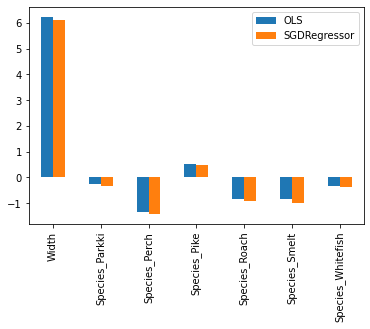

In [95]:
coef.plot(kind='bar')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the least significant variables in the data by considering 'alpha = 0.1' 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [120]:
# type your code here
sgd = SGDRegressor(alpha=0.1)
sgd_mod = sgd.fit(inpv4,box_out)
d = pd.DataFrame()
d['Coefficient'] = sgd_mod.coef_
d['Features'] = inpv4.columns
d

,Coefficient,Features
0,5.438299,Width
1,-0.386830,Species_Parkki
2,-1.204870,Species_Perch
3,0.568107,Species_Pike
4,-0.884879,Species_Roach
5,-1.164398,Species_Smelt
6,-0.215748,Species_Whitefish


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of diagonal width on the weight of a fish?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [97]:
# type your code here
inpc = sm.add_constant(inpv4['Width'])
ols = sm.OLS(box_out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1981.
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           6.21e-91
Time:                        02:41:50   Log-Likelihood:                -327.79
No. Observations:                 159   AIC:                             659.6
Df Residuals:                     157   BIC:                             665.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4620      0.152    108.477      0.000      16.162      16.762
Width          6.7544      0.152     44.508      0.000       6.455       7.054
==============================================================================
Omnibus:                       25.407   Durbin-Watson:                   0.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.078
Skew:                           0.678   Prob(JB):                     4.03e-13
Kurtosis:                       5.604   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Which value of alpha from the list of values returns lowest RMSE on the test set in ridge regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.00001, 0.001, 0.1, 10, 100]
    
Consider 5-fold cross validation.

In [98]:
# type your code here
rid = Ridge()
param = {'alpha':[0.00001, 0.001, 0.1, 10, 100]}
grid = GridSearchCV(rid,param_grid = param, cv = 5 , scoring = 'neg_mean_squared_error')
mod_hyp = grid.fit(inpv4,box_out)
print(mod_hyp.best_params_)
print(abs(mod_hyp.best_score_))

{'alpha': 1e-05}
3.79567363723213


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Select the best value for the elastic net mixing parameter from the list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the below list of values:

    list_of_parameter = [0.0001, 0.001, 0.01, 0.1, 1]

Consider 5-fold cross validation.

In [99]:
# type your code here
enet = ElasticNet()
param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1]}
grid = GridSearchCV(enet,param_grid = param, cv = 5 , scoring = 'neg_mean_squared_error')
mod_hyp = grid.fit(inpv4,box_out)
print(mod_hyp.best_params_)
print(abs(mod_hyp.best_score_))

{'alpha': 0.0001}
3.7965550867151365


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the best value of alpha from the list of values for lasso regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.0001, 0.001, 0.1, 1, 2, 3]
    
Consider 5-fold cross validation.

In [100]:
# type your code here
lasso = Lasso()
param = {'alpha':[0.0001, 0.001, 0.1, 1, 2, 3]}
grid = GridSearchCV(lasso,param_grid = param, cv = 5 , scoring = 'neg_mean_squared_error')
mod_hyp = grid.fit(inpv4,box_out)
print(mod_hyp.best_params_)
print(abs(mod_hyp.best_score_))

{'alpha': 0.0001}
3.7964014776033608


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build the elastic net regression model with 'alpha = 0.1' and best l1_ratio obtained by the GridSearchCV method. Also, compute the RMSE for test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [101]:
# type your code here
enet = ElasticNet()
param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1],
        'l1_ratio':[0.1]}
grid = GridSearchCV(enet,param_grid = param, cv = 5 , scoring = 'neg_mean_squared_error')
mod_hyp = grid.fit(inp_sc,box_out)
print(mod_hyp.best_params_)
print(abs(mod_hyp.best_score_))

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.4075068486464, tolerance: 0.6632219432237084
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.85579153889619, tolerance: 0.6777176441124015
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.717023234852007, tolerance: 0.654443311089345
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to i

{'alpha': 0.01, 'l1_ratio': 0.1}
0.8639564875850011
